In [1]:
# Data Import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from time import time 

print "importing biology"
biology = pd.read_csv("data/biology.csv")
print "importing crypto"
crypto = pd.read_csv("data/crypto.csv")
print "importing robotics"
robotics = pd.read_csv("data/robotics.csv")
print "importing diy"
diy = pd.read_csv("data/diy.csv")    
print "importing cooking"
cooking = pd.read_csv("data/cooking.csv")
print "importing travel"
travel = pd.read_csv("data/travel.csv")
    
print "importing physics test set"
test = pd.read_csv("data/test.csv") 



importing biology
importing crypto
importing robotics
importing diy
importing cooking
importing travel
importing physics test set


In [20]:
df_hash = {
#     "cooking": cooking,
#     "crypto": crypto,
#     "robotics": robotics,
    "biology": biology,
#     "travel": travel,
#     "diy": diy,
}

In [2]:
# Data Exploration
# print df_hash['biology'].columns.values

print biology.head(5)
# print df_hash['biology'].iloc[1]
# print df_hash['biology'].iloc[2]

print "\nNumber of rows by topic"
for topic, df in df_hash.iteritems():
    print topic + ": " +  str(len(df.index))
    

   id                                              title  \
0   1  What is the criticality of the ribosome bindin...   
1   2  How is RNAse contamination in RNA based experi...   
2   3      Are lymphocyte sizes clustered in two groups?   
3   4  How long does antibiotic-dosed LB maintain goo...   
4   5        Is exon order always preserved in splicing?   

                                             content  \
0  <p>In prokaryotic translation, how critical fo...   
1  <p>Does anyone have any suggestions to prevent...   
2  <p>Tortora writes in <em>Principles of Anatomy...   
3  <p>Various people in our lab will prepare a li...   
4  <p>Are there any cases in which the splicing m...   

                                                tags  
0  ribosome binding-sites translation synthetic-b...  
1                                   rna biochemistry  
2                 immunology cell-biology hematology  
3                                       cell-culture  
4            splicing mrna 

In [3]:
print test.shape

(81926, 3)


In [4]:
import nltk
# When running this notebook for first time,
# uncomment command below, select "stopwords" in gui, and follow prompt to download

# nltk.download()
from nltk.corpus import stopwords

# In Python, searching a set is much faster than searching a list, so convert the stop words to a set
stops = set(stopwords.words("english"))  

https://www.kaggle.com/c/word2vec-nlp-tutorial#part-1-for-beginners-bag-of-words

In [5]:
from bs4 import BeautifulSoup
import re
from nltk.stem import WordNetLemmatizer

def separate_tags(tags):
    return tags.split(" ")

def clean_data(raw_data):
    if raw_data:
        # remove html tags & code snippets
        soup = BeautifulSoup(raw_data, "html.parser")

        [s.extract() for s in soup(['pre', 'code'])]
            
        question_text = soup.get_text()
        
        # remove everything but letters
        letters_only = re.sub("[^a-zA-Z]", " ", question_text) 
            
        # normalize case
        words = letters_only.lower().split()   

        # remove stopwords         
        meaningful_words = [w for w in words if not w in stops] 
        
        # remove permutations of the same word by reducing it to its stem
        wordnet_lemmatizer = WordNetLemmatizer()
        meaningful_word_stems = map(lambda x: wordnet_lemmatizer.lemmatize(x) , meaningful_words)
        return( " ".join( meaningful_word_stems )) 
    else:
        return ""

In [21]:
# Data Preprocessing

# training set
for topic, df in df_hash.iteritems():
    df.content = df.content.apply(lambda x: clean_data(x) )
    df.title = df.title.apply(lambda x: clean_data(x) )
    df.tags = df.tags.apply(lambda y: separate_tags(y) )
    # drop rows without tags
    df.tags.replace(['', ' ', 'untagged'], np.nan, inplace=True)
    df.dropna(subset=['tags'], inplace=True)
    

# testing set
# test.content = test.content.apply(lambda x: clean_data(x) )
# test.title = test.title.apply(lambda x: clean_data(x) )

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

def top_tfidf_feats(row, features, top_n=20):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_indicies = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_indicies]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''

    x = np.arange(len(dfs["feature"]))
    fig = plt.figure(figsize=(12, 14), facecolor="w")

    ax = fig.add_subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_frame_on(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
    ax.set_title( str(dfs.label), fontsize=16)
    ax.barh(x, dfs["tfidf"], align='center', color='#3F5D7D')
    ax.set_yticks(x)
    ax.set_ylim([-1, len(x) +1])
    ax.set_xlim([0, 7])
    yticks = ax.set_yticklabels(dfs["feature"])
    plt.show()
    fig_file_name = str(dfs.label) + '_tfidf.png'
    plt.savefig(fig_file_name)

In [38]:
from wordcloud import WordCloud

def print_wordcloud(dfs):
    text = ' '.join(str(x) for x in dfs.tags.values) 
    
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0, max_words=100,
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    fig_file_name = str(dfs.label) + '_wordcloud.png'
    plt.savefig(fig_file_name, bbox_inches='tight')

biology
Finding terms with top tf-idf from question's titles


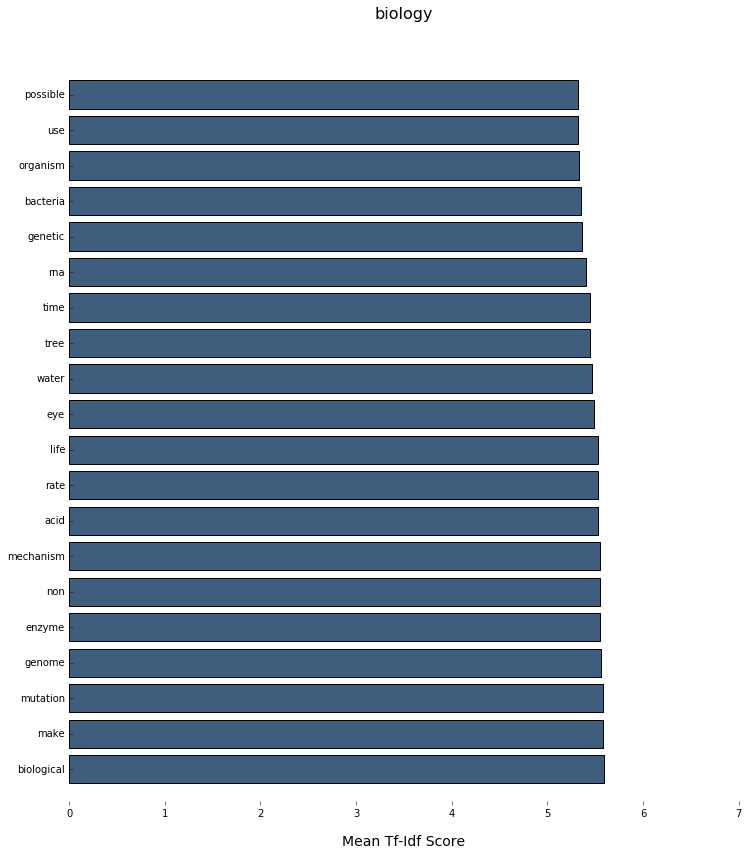

Finding most popular tags


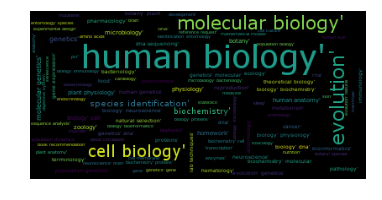

In [42]:
# Data Visualization

from sklearn.feature_extraction.text import TfidfVectorizer

vect_hash = {}

for topic, df in df_hash.iteritems():
    if topic == "test":
        next
    else:
        vect_hash[topic] = TfidfVectorizer( lowercase=True , stop_words="english" ,min_df=.01, max_df= .95 ) 
        X = vect_hash[topic].fit_transform(df.title)

        dfs = top_tfidf_feats( vect_hash[topic].idf_ , vect_hash[topic].get_feature_names()  ) 
        dfs.label = topic
        df.label = topic
        print topic
        print "Finding terms with top tf-idf from question's titles"
        plot_tfidf_classfeats_h(dfs)
        print "Finding most popular tags"
        print_wordcloud(df)

        

In [10]:
frames = []
for topic, df in df_hash.iteritems():
    frames.append(df)

df_all = pd.concat(frames)
# print df_all.tags


In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
    
class Selector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [12]:
# Implementation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score, make_scorer, accuracy_score, confusion_matrix

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.tree import DecisionTreeClassifier

parameters = {
    "union__title__tfidf__min_df" : [ 0.001, 0.005, 0.01 , 0.05],
    "union__title__tfidf__max_df" : [0.9, 0.95 , 0.975],
    "union__content__tfidf__min_df" : [ 0.001, 0.005, 0.01 , 0.05],
    "union__content__tfidf__max_df" : [0.9, 0.95 , 0.975],
    "DT__estimator__max_depth" : [5, 10, 25, 30],
    "DT__estimator__criterion" : ["gini", "entropy"],
    "union__transformer_weights" :  [{"title": 0.6, "content": 0.4},
                                    {"title": 0.75, "content": 0.25}]
}

steps = [('union', FeatureUnion(
            transformer_list=[
                # Pipeline for tfidf vectorization of the question's title
                ('title', Pipeline([
                    ('selector', Selector(key='title')),
                    ('tfidf', TfidfVectorizer(lowercase=True, stop_words="english") )
                ])),
                # Pipeline for tfidf vectorization of the question's content
                ('content', Pipeline([
                    ('selector', Selector(key='content')),
                    ('tfidf', TfidfVectorizer(lowercase=True, stop_words="english") )
                ]))
            ])),
        ("DT", OneVsRestClassifier(DecisionTreeClassifier( random_state = 42)))]

pipeline = Pipeline(steps)

mlb = MultiLabelBinarizer()
Y =  pd.DataFrame(mlb.fit_transform(df_all.tags) )

t0 = time()
clf = GridSearchCV(pipeline, parameters, cv=3, scoring='f1_weighted')
clf.fit( df_all, Y )
print("done in %0.3fs" % (time() - t0))


/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))
/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 7 is present in all training examples.
  str(classes[c]))
/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 31 is present in all training examples.
  str(classes[c]))
/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 33 is present in all training examples.
  str(classes[c]))
/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 42 is present in all training examples.
  str(classes[c]))
/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 66 is present in all training examples.
  str(classes

done in 50649.447s


In [13]:

# print clf.best_estimator_
# print("Best score: %0.3f" % clf.best_score_)
# print("Best parameters set:")
# best_parameters = clf.best_estimator_.get_params()
# # print best_parameters
# print "\n\n"
# for param_name in sorted(parameters.keys()):
#     print("\t%s: %r" % (param_name, best_parameters[param_name]))

    
# for param_name in sorted(pipeline.get_params().keys()):
#     print param_name
# print clf.cv_results_.keys()


# print clf.best_estimator_
print("Best score: %0.3f" % clf.best_score_)
print("Best parameters set:")
best_parameters = clf.best_estimator_.get_params()
# print best_parameters
print "\n\n"
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))



Best score: 0.351
Best parameters set:



	DT__estimator__criterion: 'gini'
	DT__estimator__max_depth: 10
	union__content__tfidf__max_df: 0.9
	union__content__tfidf__min_df: 0.001
	union__title__tfidf__max_df: 0.9
	union__title__tfidf__min_df: 0.001
	union__transformer_weights: {'content': 0.4, 'title': 0.6}


In [14]:
# print "testing/predicting"
# t0 = time()
# y_prediction =  clf.predict(test)
# print("done in %0.3fs" % (time() - t0))
# print y_prediction.shape
# print type(y_prediction[0])

In [15]:
# Y_inv = mlb.inverse_transform(y_prediction)
# print Y_inv

In [16]:
# index = 1
# y = mlb.inverse_transform(Y)
# for actual, pred in zip(test.tags, Y_inv):
#         print('index: {0} :: {1} => {2}'.format(index, actual, ', '.join(pred)))
#         index = index +1

# df_out = pd.DataFrame(columns=['id', 'tags'])

# for y, t in zip(Y_inv, test.id):
#     temp_hash = {'id': t,
#             'tags': ' '.join(map(lambda x:  "".join(x) , y))}
#     df_out = df_out.append(temp_hash,ignore_index=True)

    
# df_out.id = df_out.id.astype(int)

# print df_out.head(2)

In [17]:
# print test.head(2)
# df_out.to_csv("roman_levitas_physics.csv", index = False)

https://www.civisanalytics.com/blog/workflows-in-python-using-pipeline-and-gridsearchcv-for-more-compact-and-comprehensive-code/

In [18]:
# f1_score(Y_physics, y_prediction, average='weighted')
from sklearn import tree
import pydot
# print  clf.estimator.named_steps
# , feature_names=clf.estimator.get_feature_names()
# for tr in :
index = 0
while index < 5 :
    fileStr = "tree" + str(index) + ".dot"
    with open(fileStr, "w") as output_file:
        tree.export_graphviz(clf.best_estimator_.named_steps['DT'].estimators_[index], class_names=mlb.classes_, out_file=output_file)

    (graph,) = pydot.graph_from_dot_file(fileStr)
    graph.write_png("tree" + str(index) + '.png')
    
    index += 1
    

In [19]:

# print len(clf.best_estimator_.named_steps['DT'].estimators_)




